In [1]:
pip show scikit-learn

Name: scikit-learn
Version: 0.22.1
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: c:\users\naved\anaconda3\lib\site-packages
Requires: scipy, joblib, numpy
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade scikit-learn

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.1
    Uninstalling scikit-learn-0.22.1:
      Successfully uninstalled scikit-learn-0.22.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("D:/bank-marketing.csv")

In [3]:
data

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,60000,married,tertiary,yes,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,55000,divorced,primary,yes,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,55000,married,secondary,yes,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,20000,married,secondary,yes,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
data.columns.value_counts()

age          1
contact      1
poutcome     1
previous     1
pdays        1
campaign     1
duration     1
month        1
day          1
loan         1
job          1
housing      1
balance      1
default      1
targeted     1
education    1
marital      1
salary       1
response     1
dtype: int64

In [5]:
data.response.value_counts()

no     39922
yes     5289
Name: response, dtype: int64

<AxesSubplot:>

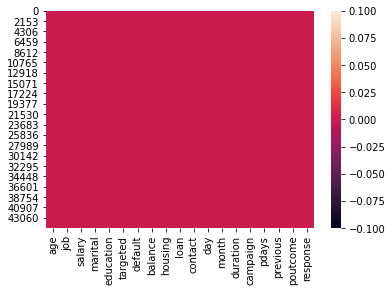

In [6]:
sns.heatmap(data.isnull())

#### NO null values

###### 1  -Describe the pdays column, make note of the mean, median and minimum values. Anything fishy in the values?

In [7]:
data.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='pdays'>

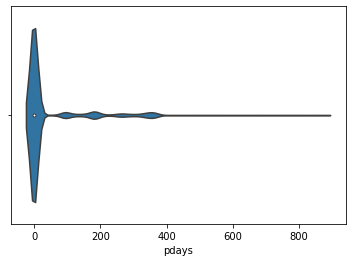

In [8]:
sns.violinplot(data['pdays'])

In [9]:
print('median',data.pdays.median())
print('mean:',data.pdays.mean())
print('mode:',data.pdays.mode())

median -1.0
mean: 40.19782796222158
mode: 0   -1
dtype: int64


#### 2 -	Describe the pdays column again, this time limiting yourself to the relevant values of pdays. How different are the mean and the median values?

In [10]:
data.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [11]:
dataWOP = data[data.pdays != -1]

<AxesSubplot:xlabel='pdays'>

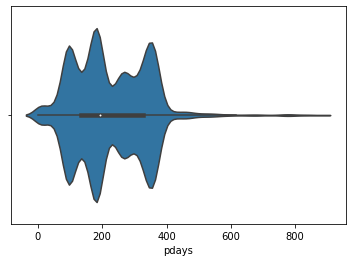

In [12]:
sns.violinplot(dataWOP.pdays)

In [13]:
print('median',dataWOP.pdays.median())
print('mean:',dataWOP.pdays.mean())
print('mode:',dataWOP.pdays.mode())

median 194.0
mean: 224.57769165556496
mode: 0    182
dtype: int64


##### As there are no values for customers who were not approached ( -1). The mean median and mode have changed significantly.

###### 3 -	Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

In [14]:
data.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [15]:
data.columns

Index(['age', 'job', 'salary', 'marital', 'education', 'targeted', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'response'],
      dtype='object')

In [16]:
data.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

<AxesSubplot:xlabel='balance', ylabel='education'>

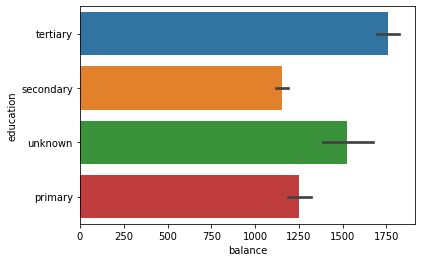

In [17]:
sns.barplot(data.balance,data.education)

######  4 - Make a box plot for pdays. Do you see any outliers?

outliers with -1


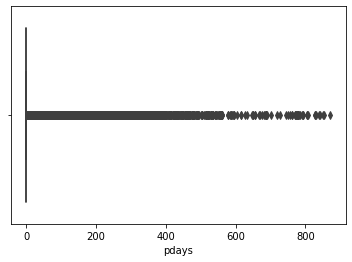

In [18]:
sns.boxplot(data.pdays)
print('outliers with -1')

outliers without -1


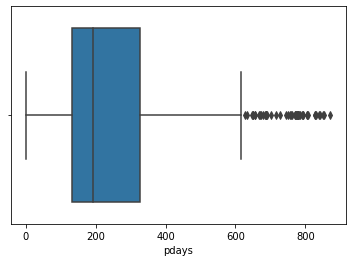

In [19]:
sns.boxplot(dataWOP.pdays)
print('outliers without -1')

#### Yes we can seee there are outliers in pdays

### EDA

<AxesSubplot:>

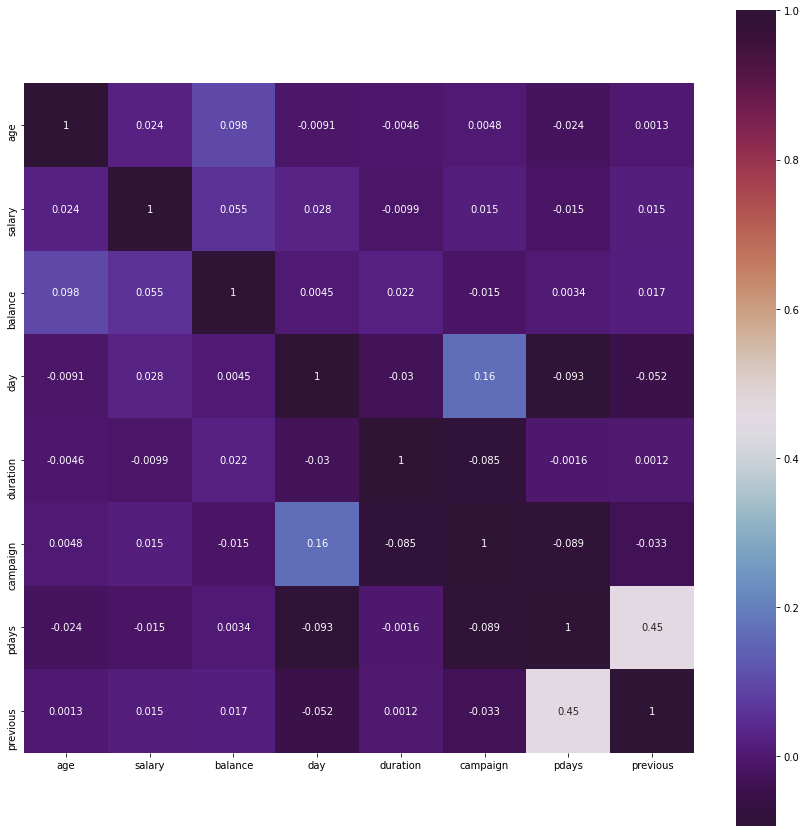

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),square=True,annot=True,cmap= 'twilight_shifted')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [22]:
data.replace({'response': {"yes": 1,'no':0}},inplace=True)

In [23]:
### identigyind categorical and numerical columns
cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

### Visualizing Categorical Features with Deposit

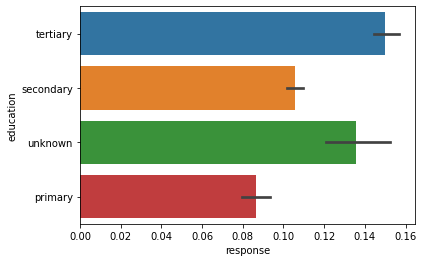

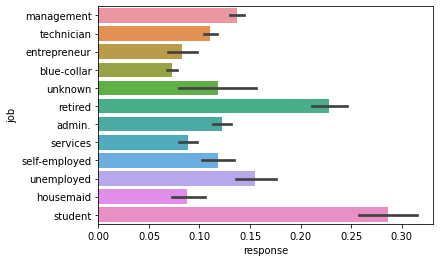

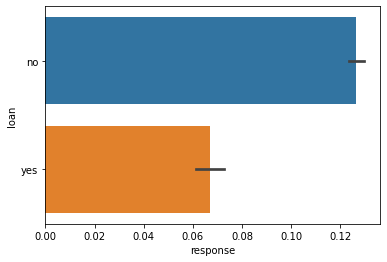

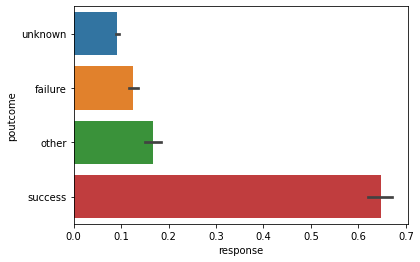

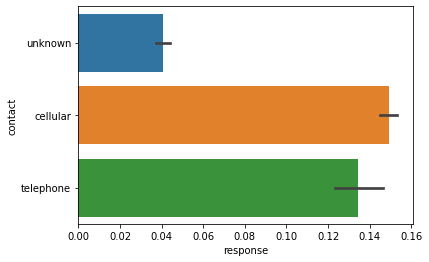

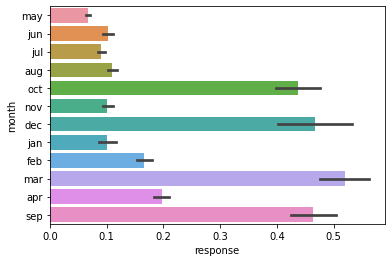

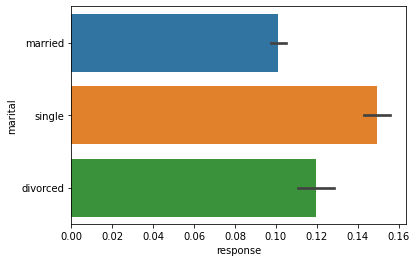

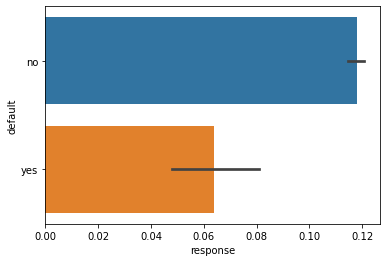

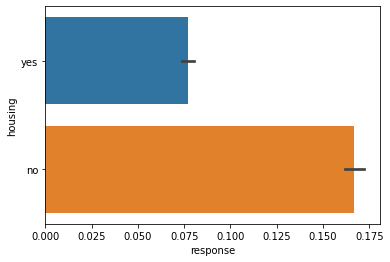

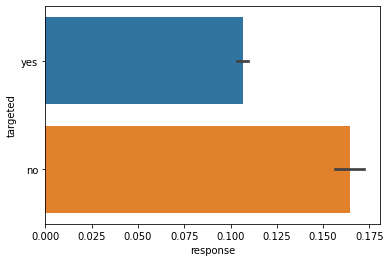

In [24]:
for i in data[cat_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

###  Visualizing Numerical Features with Deposit

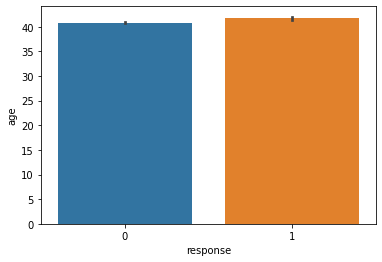

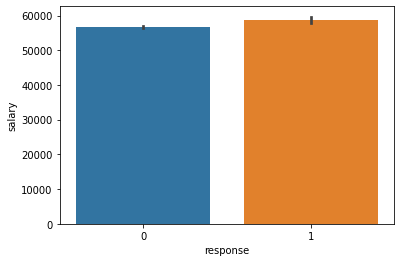

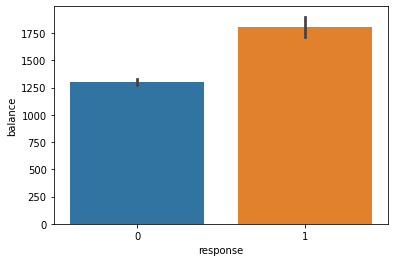

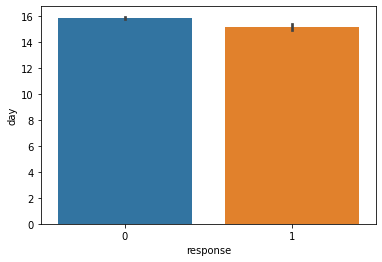

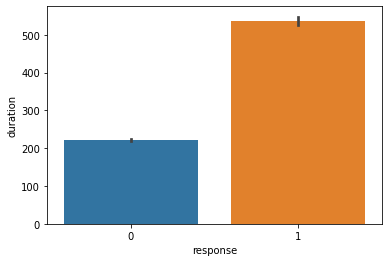

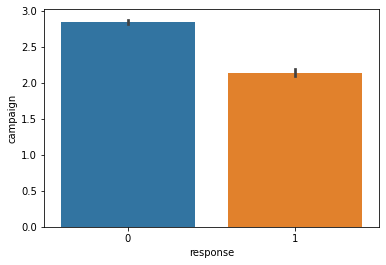

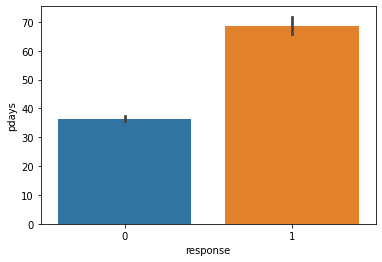

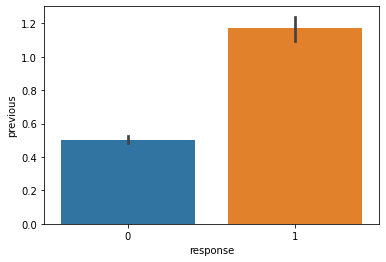

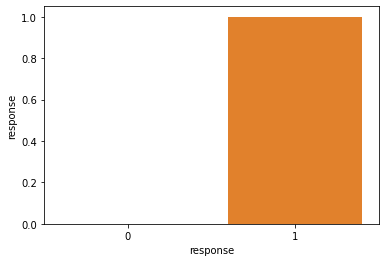

In [25]:
for i in data[num_cols]:
    sns.barplot(data.response,data[i])
    plt.show()

In [26]:
cols = data.columns
num_cols= data._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

In [27]:
data[cat_cols]

,education,job,loan,poutcome,contact,month,marital,default,housing,targeted
0,tertiary,management,no,unknown,unknown,may,married,no,yes,yes
1,secondary,technician,no,unknown,unknown,may,single,no,yes,yes
2,secondary,entrepreneur,yes,unknown,unknown,may,married,no,yes,yes
3,unknown,blue-collar,no,unknown,unknown,may,married,no,yes,no
4,unknown,unknown,no,unknown,unknown,may,single,no,no,no
...,...,...,...,...,...,...,...,...,...,...
45206,tertiary,technician,no,unknown,cellular,nov,married,no,no,yes
45207,primary,retired,no,unknown,cellular,nov,divorced,no,no,yes
45208,secondary,retired,no,success,cellular,nov,married,no,no,yes
45209,secondary,blue-collar,no,unknown,telephone,nov,married,no,no,yes


In [28]:
data[num_cols]

,age,salary,balance,day,duration,campaign,pdays,previous,response
0,58,100000,2143,5,261,1,-1,0,0
1,44,60000,29,5,151,1,-1,0,0
2,33,120000,2,5,76,1,-1,0,0
3,47,20000,1506,5,92,1,-1,0,0
4,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,-1,0,1
45207,71,55000,1729,17,456,2,-1,0,1
45208,72,55000,5715,17,1127,5,184,3,1
45209,57,20000,668,17,508,4,-1,0,0


## PreProcessing

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
data1 = data[cat_cols].apply(LabelEncoder().fit_transform)

In [31]:
data1

,education,job,loan,poutcome,contact,month,marital,default,housing,targeted
0,2,4,0,3,2,8,1,0,1,1
1,1,9,0,3,2,8,2,0,1,1
2,1,2,1,3,2,8,1,0,1,1
3,3,1,0,3,2,8,1,0,1,0
4,3,11,0,3,2,8,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
45206,2,9,0,3,0,9,1,0,0,1
45207,0,5,0,3,0,9,0,0,0,1
45208,1,5,0,2,0,9,1,0,0,1
45209,1,1,0,3,1,9,1,0,0,1


In [32]:
dataf = data1.join(data[num_cols])

In [33]:
dataf

,education,job,loan,poutcome,contact,month,marital,default,housing,targeted,age,salary,balance,day,duration,campaign,pdays,previous,response
0,2,4,0,3,2,8,1,0,1,1,58,100000,2143,5,261,1,-1,0,0
1,1,9,0,3,2,8,2,0,1,1,44,60000,29,5,151,1,-1,0,0
2,1,2,1,3,2,8,1,0,1,1,33,120000,2,5,76,1,-1,0,0
3,3,1,0,3,2,8,1,0,1,0,47,20000,1506,5,92,1,-1,0,0
4,3,11,0,3,2,8,2,0,0,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,2,9,0,3,0,9,1,0,0,1,51,60000,825,17,977,3,-1,0,1
45207,0,5,0,3,0,9,0,0,0,1,71,55000,1729,17,456,2,-1,0,1
45208,1,5,0,2,0,9,1,0,0,1,72,55000,5715,17,1127,5,184,3,1
45209,1,1,0,3,1,9,1,0,0,1,57,20000,668,17,508,4,-1,0,0


In [34]:
dataf[dataf.pdays == -1]

,education,job,loan,poutcome,contact,month,marital,default,housing,targeted,age,salary,balance,day,duration,campaign,pdays,previous,response
0,2,4,0,3,2,8,1,0,1,1,58,100000,2143,5,261,1,-1,0,0
1,1,9,0,3,2,8,2,0,1,1,44,60000,29,5,151,1,-1,0,0
2,1,2,1,3,2,8,1,0,1,1,33,120000,2,5,76,1,-1,0,0
3,3,1,0,3,2,8,1,0,1,0,47,20000,1506,5,92,1,-1,0,0
4,3,11,0,3,2,8,2,0,0,0,33,0,1,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,2,8,0,3,0,9,2,0,0,0,23,4000,113,17,266,1,-1,0,1
45205,1,9,1,3,0,9,2,0,0,1,25,60000,505,17,386,2,-1,0,1
45206,2,9,0,3,0,9,1,0,0,1,51,60000,825,17,977,3,-1,0,1
45207,0,5,0,3,0,9,0,0,0,1,71,55000,1729,17,456,2,-1,0,1


In [35]:
dataf.pdays.value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

### More than 70% of pdays have -1.

In [36]:
#dataf.drop('pdays',axis=1)

##### After analyzing the we know that Pdays dones play any important role in model so we keep it as it is.
##### The -1 or the missing values are kept as it is as we would not be using that in modelling part

<AxesSubplot:>

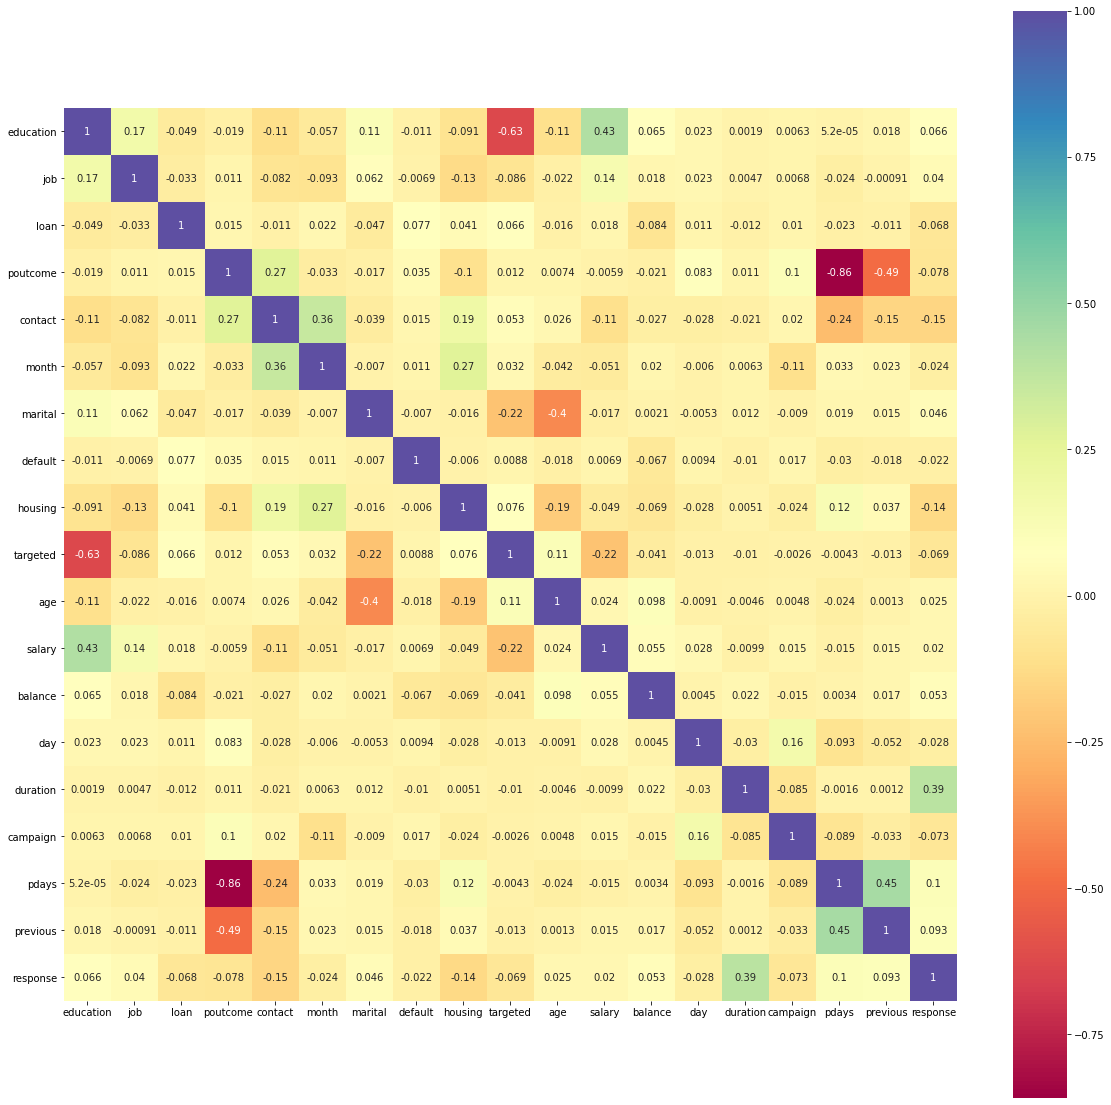

In [37]:
plt.figure(figsize=(20,20))
sns.heatmap(dataf.corr(),square=True,annot=True,cmap= 'Spectral')

In [38]:
dataf.corr()

,education,job,loan,poutcome,contact,month,marital,default,housing,targeted,age,salary,balance,day,duration,campaign,pdays,previous,response
education,1.000000,0.166707,-0.048574,-0.019361,-0.110928,-0.057304,0.108576,-0.010718,-0.090790,-0.627959,-0.106807,0.425256,0.064514,0.022671,0.001935,0.006255,0.000052,0.017570,0.066241
job,0.166707,1.000000,-0.033004,0.011010,-0.082063,-0.092870,0.062045,-0.006853,-0.125363,-0.085926,-0.021868,0.141655,0.018232,0.022856,0.004744,0.006839,-0.024455,-0.000911,0.040438
loan,-0.048574,-0.033004,1.000000,0.015458,-0.010873,0.022145,-0.046893,0.077234,0.041323,0.066297,-0.015655,0.017749,-0.084350,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
poutcome,-0.019361,0.011010,0.015458,1.000000,0.272214,-0.033038,-0.016850,0.034898,-0.099971,0.011885,0.007367,-0.005864,-0.020967,0.083460,0.010925,0.101588,-0.858362,-0.489752,-0.077840
contact,-0.110928,-0.082063,-0.010873,0.272214,1.000000,0.361145,-0.039201,0.015404,0.188123,0.053247,0.026221,-0.108612,-0.027273,-0.027936,-0.020839,0.019614,-0.244816,-0.147811,-0.148395
month,-0.057304,-0.092870,0.022145,-0.033038,0.361145,1.000000,-0.006991,0.011486,0.271481,0.031828,-0.042357,-0.050723,0.019777,-0.006028,0.006314,-0.110031,0.033065,0.022727,-0.024471
marital,0.108576,0.062045,-0.046893,-0.016850,-0.039201,-0.006991,1.000000,-0.007023,-0.016096,-0.219610,-0.403240,-0.016633,0.002122,-0.005261,0.011852,-0.008994,0.019172,0.014973,0.045588
default,-0.010718,-0.006853,0.077234,0.034898,0.015404,0.011486,-0.007023,1.000000,-0.006025,0.008825,-0.017879,0.006860,-0.066745,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
housing,-0.090790,-0.125363,0.041323,-0.099971,0.188123,0.271481,-0.016096,-0.006025,1.000000,0.075543,-0.185513,-0.048965,-0.068768,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
targeted,-0.627959,-0.085926,0.066297,0.011885,0.053247,0.031828,-0.219610,0.008825,0.075543,1.000000,0.113202,-0.222868,-0.040699,-0.012891,-0.010280,-0.002597,-0.004350,-0.013253,-0.069039


## ML Modelling

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score

### All Single feature with Logistic Regression

In [40]:
X = dataf.drop(['response'],axis=1)
y = dataf['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("F1 Score for" , f1_score(y_pred,y_test))

F1 Score for 0.24863793957404656


## All Features

In [41]:
X = dataf.drop('response',axis=1)
y = dataf['response']

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [43]:
lr = LogisticRegression(random_state=101)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [44]:
print('Report:\n',classification_report(y_test, y_pred))
print("F1 Score:",f1_score(y_pred,y_test))
print('confusion Matrix:\n',confusion_matrix(y_pred,y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     11967
           1       0.59      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.75      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564

F1 Score: 0.24863793957404656
confusion Matrix:
 [[11796  1346]
 [  171   251]]
cross validation: [0.90224483 0.88984738 0.88840964 0.84372926 0.85301924]


In [45]:
model = sm.OLS(y, X)
results = model.fit()
start = "\033[1m" ### for bold text
print(start)
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:               response   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.303
Method:                 Least Squares   F-statistic:                              1093.
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                        0.00
Time:                        16:27:26   Log-Likelihood:                         -7476.0
No. Observations:               45211   AIC:                                  1.499e+04
Df Residuals:                   45193   BIC:                                  1.515e+04
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

## Using RFE

In [65]:
### Using Rfe
from sklearn.feature_selection import RFE
rfe = RFE(estimator= lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(random_state=101), n_features_to_select=15)

In [66]:
print(X_train.columns[rfe.support_])
cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],y_train)
y_pred2 = lr.predict(X_test[cols])

Index(['education', 'job', 'loan', 'poutcome', 'contact', 'month', 'marital',
       'default', 'housing', 'targeted', 'age', 'day', 'duration', 'campaign',
       'previous'],
      dtype='object')


In [67]:
def logReggResult():
    print('Report:\n',classification_report(y_test, y_pred2))
    print("F1 Score:",f1_score(y_pred2,y_test))
    print('AUC score:',roc_auc_score(y_test,y_pred2))
    print('confusion Matrix:\n',confusion_matrix(y_pred2,y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :::>",accuracy_score(y_pred2,y_test))

In [68]:
logReggResult()

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.63      0.21      0.31      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.63     13564
weighted avg       0.87      0.89      0.87     13564

F1 Score: 0.30987246102975907
AUC score: 0.5946704878616572
confusion Matrix:
 [[11775  1269]
 [  192   328]]
kfold cross validation:
 [0.90224483 0.88984738 0.88840964 0.84372926 0.85301924]
Acurracy :::> 0.892288410498378


In [69]:
## Feature Importance
from sklearn.feature_selection import SelectFromModel
smf = SelectFromModel(lr)
smf.fit(X_train,y_train)
features = smf.get_support()
feature_name = X_train.columns[features]
feature_name

Index(['month', 'age', 'day'], dtype='object')

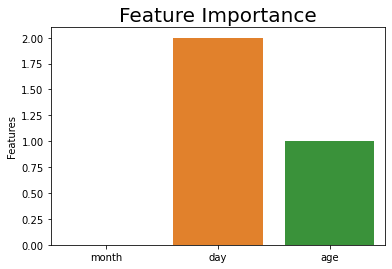

In [70]:
importances=feature_name
feature_importances=pd.Series(importances).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
X = dataf.drop('response',axis=1)
y = dataf['response']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [73]:
rfc = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=101,max_leaf_nodes=50)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, max_leaf_nodes=50, n_estimators=50,
                       random_state=101)

In [74]:
y_pred1 = rfc.predict(X_test)

In [75]:
from sklearn.tree import export_graphviz
estimator = rfc.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'response',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [76]:
os.system('dot -Tpng tree1.dot -o tree1.png')

0

In [77]:
from IPython.display import Image


In [78]:
def RF():
    print('Report:\n',classification_report(y_test, y_pred1))
    print("F1 Score:",f1_score(y_pred1,y_test))
    print('confusion Matrix:\n',confusion_matrix(y_pred1,y_test))
    print('cross validation:',cross_val_score(rfc, X, y, cv=5))
    print('AUC score:',roc_auc_score(y_test,y_pred))
    print("Acurracy :::>",accuracy_score(y_pred,y_test))

In [79]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.82      0.15      0.26      1597

    accuracy                           0.90     13564
   macro avg       0.86      0.57      0.60     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.2565997888067582
confusion Matrix:
 [[11913  1354]
 [   54   243]]
cross validation: [0.88300343 0.88365406 0.87524884 0.70471135 0.82537049]
AUC score: 0.5714401988059525
Acurracy :::> 0.8881598348569744


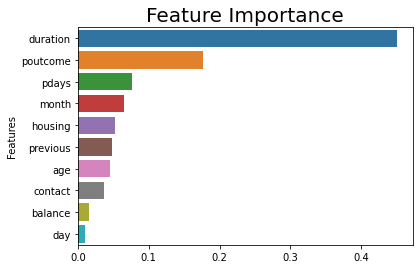

In [80]:
importances=rfc.feature_importances_
feature_importances=pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10])
plt.title('Feature Importance',size=20)
plt.ylabel("Features")
plt.show()

# Comparision 

### We choose the F1 Score and Confustion Matrix for the Final comparision of both Models because the Target Variable is imbalanced. So, Precision and Recall can be the main factor for evaluation model and we get the harmonic mean for the same in form of F1 score.

In [81]:
print (start + "############### Random Forest Result: ###############\n")
RF()
print(start +'\n\n############# Logistic Regression Result: ############\n')
logReggResult()

############### Random Forest Result: ###############

Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.94     11967
           1       0.82      0.15      0.26      1597

    accuracy                           0.90     13564
   macro avg       0.86      0.57      0.60     13564
weighted avg       0.89      0.90      0.86     13564

F1 Score: 0.2565997888067582
confusion Matrix:
 [[11913  1354]
 [   54   243]]
cross validation: [0.88300343 0.88365406 0.87524884 0.70471135 0.82537049]
AUC score: 0.5714401988059525
Acurracy :::> 0.8881598348569744


############# Logistic Regression Result: ############

Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     11967
           1       0.63      0.21      0.31      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.59      0.63     13564
weighted avg       0.87      0.89      0.87     13564

### We see that the Random Forest has Perfomed good in comparision to Logistic Regression.

### Random Forest has Better F1 score,  AUC,  Confusion Matrix, kfold Cross val and accuracy in compare to Logistic Regression.

### The Main Features for the both Models/ Algorithm Differs as Random Forest and Logistic Regression Works on different Principal

### Please do Upvote if you like kernal.